# Introdução a Machine Learning - Venda de Carros

Neste projeto vamos analisar uma base de dados de vendas de carros, na qual traz informações de sobre o veículo e se este foi vendido ou não. Nosso objetivo é treinar um modelo que possa predizer se passando as características do veículo nos retorne se ele será vendido ou não.

## Importando a base de dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df_carros = pd.read_csv(url)
df_carros.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
colunas = {
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold':'vendido'
}

df_carros.rename(columns = colunas, inplace = True)
df_carros.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
mapa = {
    'yes' : 1,
    'no': 0
}

df_carros.vendido = df_carros.vendido.map(mapa)
df_carros.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

In [ ]:
ano_atual = datetime.today().year

df_carros['idade_veiculo'] = ano_atual - df_carros.ano_do_modelo
df_carros.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_veiculo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [ ]:
df_carros.drop(['Unnamed: 0','ano_do_modelo'], axis = 1,inplace = True)
df_carros.head()

,milhas_por_ano,preco,vendido,idade_veiculo
0,21801,30941.02,1,21
1,7843,40557.96,1,23
2,7109,89627.50,0,15
3,26823,95276.14,0,6
4,7935,117384.68,1,7


In [ ]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   milhas_por_ano  10000 non-null  int64  
 1   preco           10000 non-null  float64
 2   vendido         10000 non-null  int64  
 3   idade_veiculo   10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


In [ ]:
df_carros.describe()

,milhas_por_ano,preco,vendido,idade_veiculo
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,14183.391200,64842.373698,0.580000,16.85580
std,5008.571422,25250.592393,0.493583,4.68758
min,363.000000,-840.360000,0.000000,4.00000
25%,10474.750000,44796.375000,0.000000,14.00000
50%,13418.500000,65225.685000,1.000000,18.00000
75%,17176.750000,85111.237500,1.000000,21.00000
max,39572.000000,118929.720000,1.000000,23.00000


##Visualizações da base de dados 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cores = ['#1696d2','#fdbf11']
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette(cores))

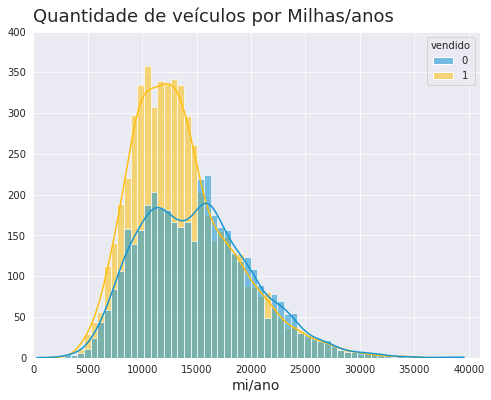

In [ ]:
fig = plt.figure(figsize = (8,6))

ax = sns.histplot(data = df_carros, x = 'milhas_por_ano', kde = True, hue = 'vendido', alpha = 0.55)
ax.set_title('Quantidade de veículos por Milhas/anos ',fontsize = 18, loc = 'left', pad = 10)
ax.set_xlabel('mi/ano',fontsize = 14)
ax.set_ylabel('')

plt.xlim(0,41000)
plt.ylim(0,400)

plt.show()

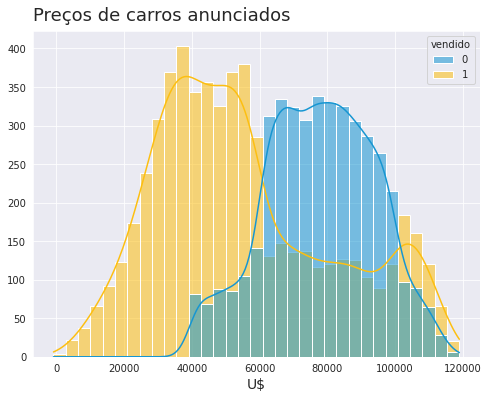

In [ ]:
fig = plt.figure(figsize = (8,6))

ax = sns.histplot(data = df_carros, x = 'preco', kde = True, hue = 'vendido', alpha = 0.55)
ax.set_title('Preços de carros anunciados',fontsize = 18, loc = 'left', pad = 10)
ax.set_xlabel('U$',fontsize = 14)
ax.set_ylabel('')

plt.show()

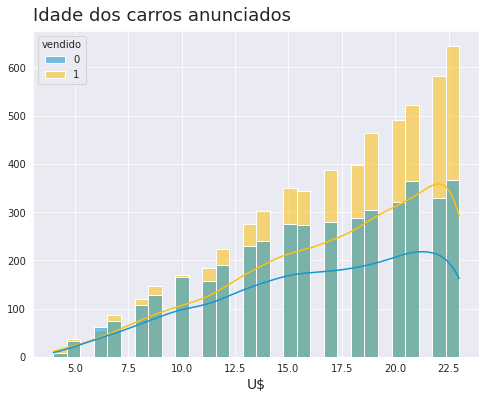

In [ ]:
fig = plt.figure(figsize = (8,6))

ax = sns.histplot(data = df_carros, x = 'idade_veiculo', kde = True, hue = 'vendido', alpha = 0.55,  )
ax.set_title('Idade dos carros anunciados',fontsize = 18, loc = 'left', pad = 10)
ax.set_xlabel('U$',fontsize = 14)
ax.set_ylabel('')

plt.show()

##Criando modelos de previsões

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

###Dummy classifiers

Modelo de teste simples que servirá de linha de base de aceeitação ou não de outros algoritmos, algoritmos do tipo Dummy utilizam regras simples de decisão, por exemplo a regra de estimar iguais a classe mais frequente na base de dados.

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
SEED = 50
np.random.seed(SEED)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state= SEED, stratify = y)

dummy_stratified = DummyClassifier(strategy = 'stratified')
dummy_stratified.fit(X_treino,y_treino)
acuracia = dummy_stratified.score(X_teste,y_teste)*100
print('Acurácia do dummy stratified: %.2f %%' %acuracia)

Acurácia do dummy stratified: 50.36 %


In [ ]:
SEED = 50
np.random.seed(SEED)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state= SEED, stratify = y)

dummy_most_frequent = DummyClassifier(strategy = 'most_frequent')
dummy_most_frequent.fit(X_treino,y_treino)
acuracia = dummy_most_frequent.score(X_teste,y_teste)*100
print('Acurácia do dummy most_frequent: %.2f %%' %acuracia)

Acurácia do dummy most_frequent: 58.00 %


###Modelos de SVM

#### Modelo linear classificatório

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
X = df_carros[['milhas_por_ano','preco','idade_veiculo']]
y = df_carros.vendido

In [ ]:
SEED = 50
np.random.seed(SEED)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state= SEED, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))

modelo = LinearSVC(random_state = SEED,max_iter= 2500)
modelo.fit(X_treino,y_treino)
previsoes = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, previsoes) *100
print('Acurácia do modelo: %.2f %%' %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia do modelo: 58.44 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### SVC 

In [ ]:
from sklearn.svm import SVC

In [ ]:
SEED = 50
np.random.seed(SEED)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))

modelo = SVC()
modelo.fit(X_treino,y_treino)

acuracia = modelo.score(X_teste,y_teste) *100
print('Acurácia do modelo: %.2f %%' %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia do modelo: 77.80 %


#### Modelo não linear

In [ ]:
from sklearn.svm import NuSVC

In [ ]:
SEED = 50
np.random.seed(SEED)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))

modelo = NuSVC(nu = 0.6)
modelo.fit(X_treino,y_treino)

acuracia = modelo.score(X_teste,y_teste) *100
print('Acurácia do modelo: %.2f %%' %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia do modelo: 77.04 %


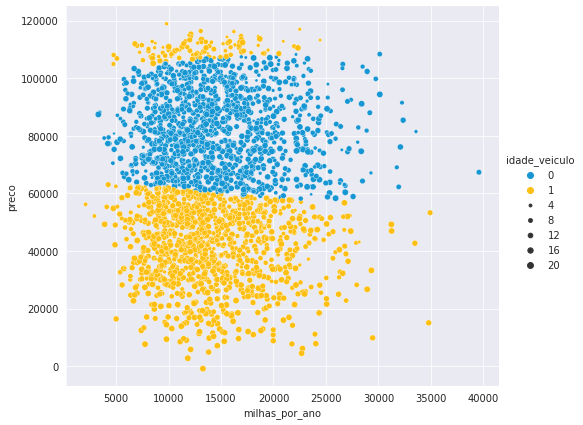

In [ ]:
previsoes = modelo.predict(X_teste)
ax = sns.relplot(data = X_teste, x = 'milhas_por_ano', y= 'preco', size = 'idade_veiculo', sizes =(8,40), height= 6, aspect = 1.2, hue = previsoes)

### Reescalando as variáveis dependentes

#### Linear reescalado

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SEED = 50
np.random.seed(SEED)

X_treino_raw, X_teste_raw, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state= SEED, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))

escala = StandardScaler()
escala.fit(X_treino_raw)

X_treino = escala.transform(X_treino_raw)
X_teste = escala.transform(X_teste_raw)

modelo = LinearSVC(random_state = SEED,max_iter= 2500)
modelo.fit(X_treino,y_treino)
previsoes = modelo.predict(X_teste)
acuracia = modelo.score(X_teste,y_teste) *100
print('Acurácia do modelo: %.2f %%' %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia do modelo: 71.76 %


#### SVC Reescalado

In [ ]:
SEED = 50
np.random.seed(SEED)

X_treino_raw, X_teste_raw, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))
escala = StandardScaler()
escala.fit(X_treino_raw)

X_treino = escala.transform(X_treino_raw)
X_teste = escala.transform(X_teste_raw)

modelo = SVC()
modelo.fit(X_treino,y_treino)

acuracia = modelo.score(X_teste,y_teste) *100
print('Acurácia do modelo: %.2f %%' %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia do modelo: 77.36 %


#### Não linear reescalado

In [ ]:
SEED = 50
np.random.seed(SEED)

X_treino_raw, X_teste_raw, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))
escala = StandardScaler()
escala.fit(X_treino_raw)

X_treino = escala.transform(X_treino_raw)
X_teste = escala.transform(X_teste_raw)

modelo = NuSVC(nu =0.60,kernel = 'rbf')
modelo.fit(X_treino,y_treino)

acuracia = modelo.score(X_teste,y_teste) *100
print('Acurácia do modelo: %.2f %%' %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia do modelo: 76.52 %


### Algoritmo de árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
SEED = 50
np.random.seed(SEED)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))

modelo = DecisionTreeClassifier(max_depth= 3)
modelo.fit(X_treino,y_treino)

acuracia = modelo.score(X_teste,y_teste) *100
print('Acurácia do modelo: %.2f %%' %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia do modelo: 79.20 %


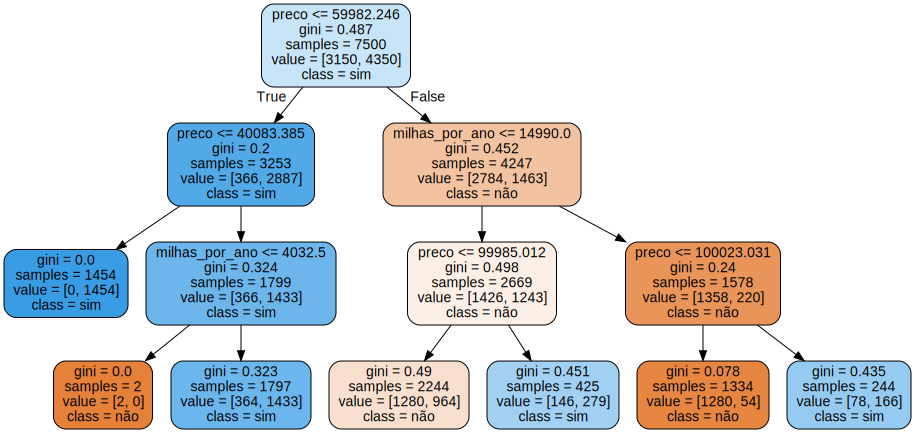

In [ ]:
features = X.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico